In [1]:
import ijson
import requests
import matplotlib.pyplot as py_plot
import numpy as np
import pandas as pd
from pyproj import Proj, transform
import folium
from folium import plugins

calls = requests.get('https://services5.arcgis.com/54falWtcpty3V47Z/arcgis/rest/services/cad_calls_year3/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json').json()

listOfDicts = calls['features']
dataDict  = {}
for line in listOfDicts:
   dataDict.update(line)
columns = list(dataDict['attributes'].keys())
print(columns)

['OBJECTID', 'Record_ID', 'Call_Type', 'Description', 'Reporting_Officer', 'Unit_ID', 'Report_Created', 'Location', 'Police_District', 'Beat', 'Grid', 'X_Coordinate', 'Y_Coordinate', 'Day_of_Week', 'Occurence_Date', 'Occurence_Time', 'Received_Date', 'Received_Time', 'Dispatch_Date', 'Dispatch_Time', 'Enroute_Date', 'Enroute_Time', 'At_Scene_Date', 'At_Scene_Time', 'Clear_Date', 'Clear_Time']


In [2]:
data = [list(row['attributes'].values()) for row in listOfDicts]
        
print(data[0:5])

[[1, '6360891', '415E', 'DISTURBANCE-NOISE', '0883', '2C14', 'N', '4101 INNOVATOR DR', '1', '1A', '0336', 6700606, 1996674, 'Sun', 1483228800000, '18:40:50', 1483228800000, '18:40:50', 1483228800000, '18:49:57', 1483228800000, '18:50:12', 1483228800000, '18:57:57', 1483228800000, '19:06:44'], [2, '6360930', '927P', 'SUSPICIOUS SUBJECT/CIRCUMSTANCE-IN PROGRESS', '0694', '1C12', 'N', '2941 ADVANTAGE WAY', '1', '1A', '0313', 6696606, 2000630, 'Sun', 1483228800000, '19:45:17', 1483228800000, '19:45:17', 1483228800000, '19:45:17', 1483228800000, '19:45:17', 1483228800000, '19:45:17', 1483228800000, '19:47:44'], [3, '6361374', 'TSTOP', 'TRAFFIC STOP', '552', 'XRY12', 'N', '2ND ST / NEASHAM CIR', '3', '3M', '0751', 6703083, 1973628, 'Sun', 1483228800000, '19:14:48', 1483228800000, '19:14:48', 1483228800000, '19:14:48', 1483228800000, '19:14:48', 1483228800000, '19:14:48', 1483228800000, '19:20:08'], [4, '6361293', 'AU', 'ALL UNITS BROADCAST', '', '', 'N', '636 TENAYA AVE', '1', '1C', '0418', 

In [3]:
calls = pd.DataFrame(data, columns=columns)

calls['Description'].value_counts()

DISTURBANCE-CLARIFY                                  9289
TRAFFIC STOP                                         7805
SUSPICIOUS SUBJECT/CIRCUMSTANCE-IN PROGRESS          4809
ALL UNITS BROADCAST                                  4547
SUBJECT STOP                                         4036
SUSPICIOUS OCCUPIED VEHICLE                          4026
WELFARE CHECK                                        3573
INCOMPLETE CALL FOR POLICE                           3008
ALARM-SECURE NO EVID OF CRIME                        2039
ERRAND                                               1428
MISDEMEANOR ASSAULT-IN PROGRESS                      1409
REPORT NUMBER ASSIGNMENT                             1394
ALARM-CANCEL                                         1365
VEHICLE ACCIDENT-NO OR UNKNOWN INJURIES              1328
BUSINESS CHECK                                       1300
CHECK ON HAZARD                                      1166
ALARM-ACCIDENTAL                                     1143
DISTURBANCE-FA

In [4]:
calls['Description'].describe()

count                   76569
unique                    177
top       DISTURBANCE-CLARIFY
freq                     9289
Name: Description, dtype: object

In [5]:
calls['Call_Type'].describe()

count     76569
unique      177
top         415
freq       9289
Name: Call_Type, dtype: object

In [6]:
print(calls)

       OBJECTID Record_ID Call_Type  \
0             1   6360891      415E   
1             2   6360930      927P   
2             3   6361374     TSTOP   
3             4   6361293        AU   
4             5   6360110      927S   
5             6   6360112      927S   
6             7   6360249      927P   
7             8   6360248      415F   
8             9   6360250       415   
9            10   6360251       415   
10           11   6360277      242P   
11           12   6360267     SSTOP   
12           13   6360268      417T   
13           14   6360269      242P   
14           15   6360270      242P   
15           16   6360271       CSI   
16           17   6360272       981   
17           18   6360274        AU   
18           19   6360279      415E   
19           20   6360156      927S   
20           21   6360189    ALMSEC   
21           22   6360190      927S   
22           23   6360292      242P   
23           24   6360293       415   
24           25   6360294

In [7]:
calls['Day_of_Week'].value_counts()

Tue    11819
Wed    11440
Fri    11189
Thu    10914
Mon    10553
Sun    10395
Sat    10259
Name: Day_of_Week, dtype: int64

In [8]:
def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
calls['X_Coordinate'] = calls['X_Coordinate'].apply(parse_float)
calls['Y_Coordinate'] = calls['Y_Coordinate'].apply(parse_float)

In [9]:
stolen = calls[calls['Description'] == 'STOLEN VEHICLE-REPORT']

print(stolen)

       OBJECTID Record_ID Call_Type            Description Reporting_Officer  \
152         153   6361145    503RPT  STOLEN VEHICLE-REPORT              0909   
181         182   6361311    503RPT  STOLEN VEHICLE-REPORT                     
618         619   6360597    503RPT  STOLEN VEHICLE-REPORT                     
649         650   6360405    503RPT  STOLEN VEHICLE-REPORT              0667   
732         733   6361499    503RPT  STOLEN VEHICLE-REPORT              8180   
1133       1134   6361654    503RPT  STOLEN VEHICLE-REPORT                     
1416       1417   6363017    503RPT  STOLEN VEHICLE-REPORT               855   
1516       1517   6362303    503RPT  STOLEN VEHICLE-REPORT              8180   
1724       1725   6363041    503RPT  STOLEN VEHICLE-REPORT                     
1913       1914   6363547    503RPT  STOLEN VEHICLE-REPORT              8180   
2178       2179   6363447    503RPT  STOLEN VEHICLE-REPORT              0901   
2232       2233   6364176    503RPT  STO

In [10]:
calls.count()

OBJECTID             76569
Record_ID            76569
Call_Type            76569
Description          76569
Reporting_Officer    76569
Unit_ID              76569
Report_Created       76569
Location             76569
Police_District      76569
Beat                 76569
Grid                 76569
X_Coordinate         76569
Y_Coordinate         76569
Day_of_Week          76569
Occurence_Date       76569
Occurence_Time       76569
Received_Date        76569
Received_Time        76569
Dispatch_Date        76569
Dispatch_Time        76569
Enroute_Date         76569
Enroute_Time         76569
At_Scene_Date        76569
At_Scene_Time        76569
Clear_Date           76569
Clear_Time           76569
dtype: int64

<IPython.core.display.Javascript object>


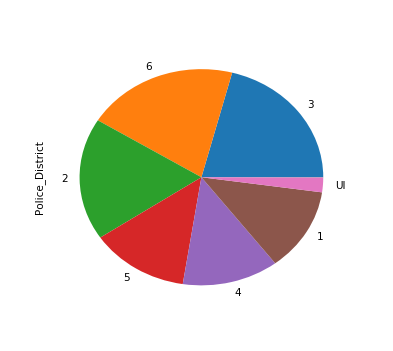

In [16]:
%matplotlib notebook
calls['Police_District'].value_counts().plot(kind='pie')

<IPython.core.display.Javascript object>


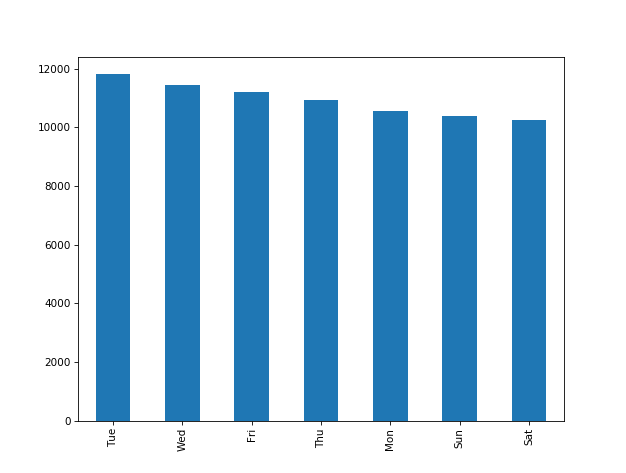

In [12]:
%matplotlib notebook
calls['Day_of_Week'].value_counts().plot(kind='bar')

In [13]:
inProj = Proj(init='epsg:2226', preserve_units = True)
outProj = Proj(init='epsg:4326')
x1,y1 = 6722570,1992314
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

-121.43672656313065 38.63153998649104


In [14]:
calls_map = folium.Map(location=[38.58, -121.5], zoom_start=11)
marker_cluster = folium.MarkerCluster().add_to(calls_map)
coords_list = []
for name, row in stolen.iloc[:1000].iterrows():   
    x1, y1 =row['X_Coordinate'],row['Y_Coordinate']
    long, lat = transform(inProj,outProj,x1,y1)
    coords = (lat,long)
    coords_list.append(coords)
    folium.Marker([lat, long], popup="Day of the week was " + row['Day_of_Week']).add_to(marker_cluster)
calls_map.save('callsnew.html')
calls_map

In [15]:
calls_heatmap = folium.Map(location=[38.58, -121.5], tiles='Stamen Toner', zoom_start=13)
calls_heatmap.add_child(plugins.HeatMap([[item[0], item[1]] for item in coords_list]))
calls_heatmap.save("heatmap.html")
calls_heatmap